### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.dpi'] = 144

### Basic Logistic Plot

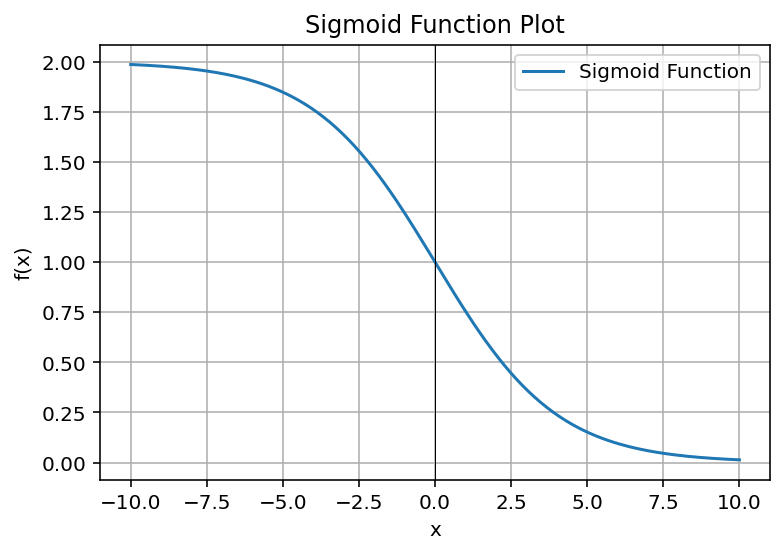

In [2]:
def plot_sigmoid_with_yaxis(L, k, x0):
    x_values = np.linspace(-10, 10, 200)
    y_values = L / (1 + np.exp(-k * (x_values - x0)))

    plt.plot(x_values, y_values, label='Sigmoid Function')
    plt.axvline(0, color='black', linewidth=0.5)  # Add a vertical line at x=0
    plt.grid(True)
    plt.title('Sigmoid Function Plot')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()

    plt.show()

# Parameters
L = 2  # Maximum value of the curve
k = -0.5   # Logistic growth rate or steepness of the curve
x0 = 0  # x value of the sigmoid midpoint

plot_sigmoid_with_yaxis(L, k, x0)


### Logistic Plot for Probability

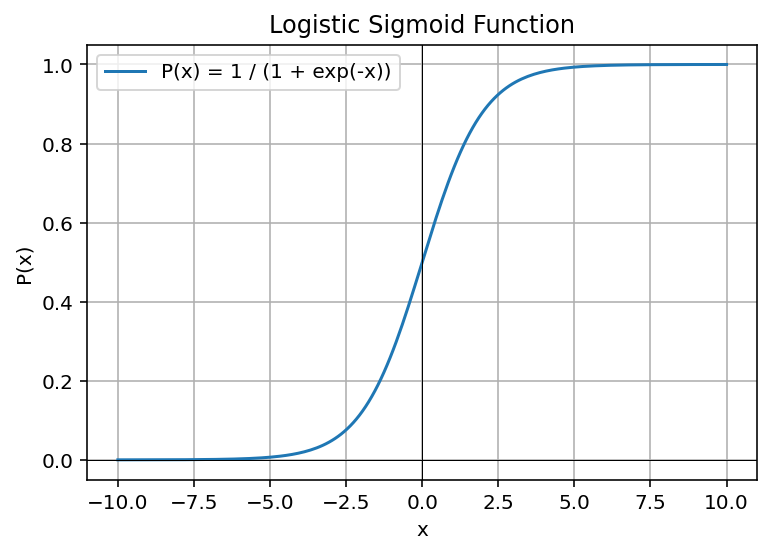

In [3]:
def P(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-10, 10, 200)
y_values = P(x_values)
plt.plot(x_values, y_values, label='P(x) = 1 / (1 + exp(-x))')
plt.title('Logistic Sigmoid Function')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()

### R(d,v) Plot

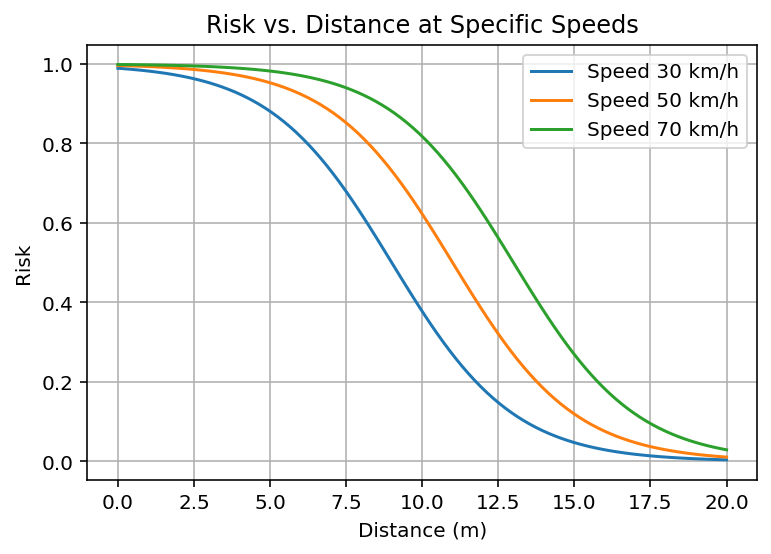

In [4]:
def calculate_risk(d, v):
    return 1 / (1 + np.exp(-(-0.5 * d + 0.05 * v + 3)))

# Define the range of distances from 0 to 20 meters for plotting
distances = np.linspace(0, 20, 100)

# Plot risk vs. distance for specific speeds (30, 50, 70 km/h)
for v in [30, 50, 70]:
    risks = [calculate_risk(d, v) for d in distances]
    plt.plot(distances, risks, label=f'Speed {v} km/h')

plt.title('Risk vs. Distance at Specific Speeds')
plt.xlabel('Distance (m)')
plt.ylabel('Risk')
plt.legend()
plt.grid(True)
plt.show()

### R(θ,v) Plot

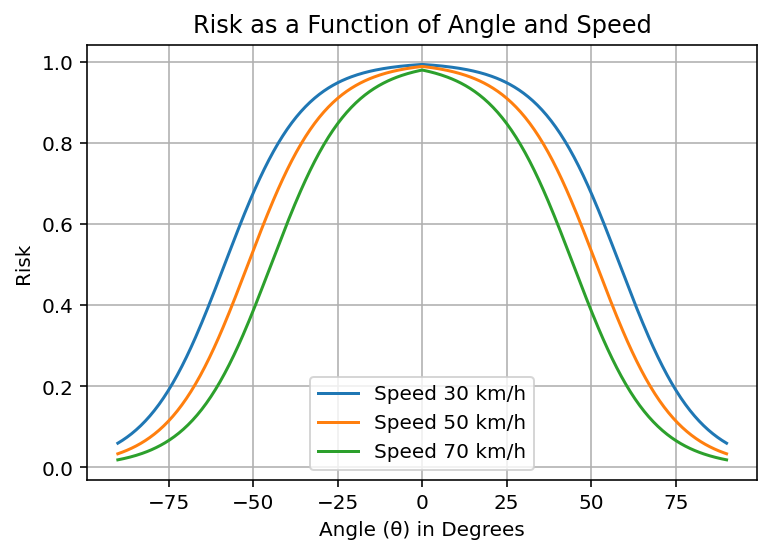

In [5]:
def calculate_risk_with_theta(theta, v):
    return 1 / (1 + np.exp(-(-5 * abs(theta) - 0.03 * v + 6)))

# Now, define the range of angles from -pi/2 to pi/2 to cover the full spectrum
thetas = np.linspace(-np.pi/2, np.pi/2, 400)

# Plot risk vs. theta for each speed, covering both positive and negative angles
for v in [30, 50, 70]:
    risks = [calculate_risk_with_theta(theta, v) for theta in thetas]
    # Plotting with thetas converted to degrees for easier interpretation
    plt.plot(np.degrees(thetas), risks, label=f'Speed {v} km/h')

plt.title('Risk as a Function of Angle and Speed')
plt.xlabel('Angle (θ) in Degrees')
plt.ylabel('Risk')
plt.legend()
plt.grid(True)
plt.show()

### R(d,θ,v) Plot

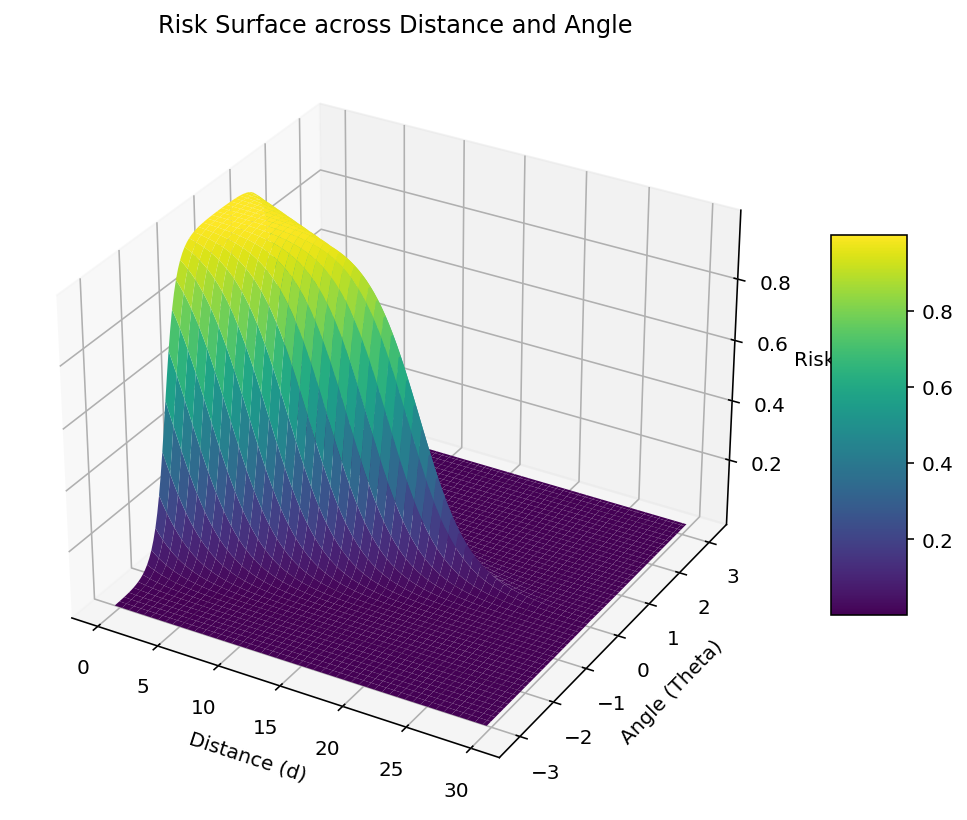

In [11]:
def combined_risk(d, theta, v):
    return 1 / (1 + np.exp(-(-0.5*d - 5*np.abs(theta) + 0.02*v + 8)))

# Generate a meshgrid for d and theta with updated distance range
D = np.linspace(0, 30, 100)
Theta = np.linspace(-np.pi, np.pi, 100)
d, theta = np.meshgrid(D, Theta)

# Take only one velocity for visualization
v = 10

# Calculate risk values with the updated distance range
risk = combined_risk(d, theta, v)

# Plot with the updated distance range
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(d, theta, risk, cmap='viridis', edgecolor='none')
ax.set_xlabel('Distance (d)')
ax.set_ylabel('Angle (Theta)')
ax.set_zlabel('Risk')
ax.set_title('Risk Surface across Distance and Angle')
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.show()